<a href="https://colab.research.google.com/github/aditya-chawla/Deep-Learning/blob/main/Polynomial_Regression_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim: Implementation of Polynomial Regression algorithm using scikit learn

In [ ]:
# Importing the libraries numpy and pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import scikit learn library for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
## USA housing data
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
# Read the data and drop unnecessary column (address column) using dataframe.drop and plot first five rows to confirm
df=pd.read_csv('USA_Housing.csv')
df=df.drop('Address',1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


MultiVariate Linear Regression (USA Housing Data)

In [ ]:
# make a data frame X with all columns except price and Y with Price column
x = df.iloc[:,:-1].values/10000
y = df['Price'].values/10000

In [ ]:
# divide the data set samples into train and test data samples using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# create Linear Regression object and Train the data model using object.fit method 
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Display the updated value of theta0 and and other parameters and also make a dataframe having column names in X as dataframe index and coefficients/parameters as column name
all_coeff=[lr.intercept_]+list(lr.coef_)
pd.DataFrame(np.array(all_coeff).reshape(1,-1), columns=[f"theta{i}" for i in range(len(all_coeff))])

,theta0,theta1,theta2,theta3,theta4,theta5
0,-264.663053,21.660408,165809.651149,120329.407877,2193.095579,15.285885


In [ ]:
# make the best hypothesis for given training data samples using object.predict method
y_train_pred=lr.predict(x_train)

In [ ]:
# Predict the hypothesis for given test data samples using hypothesis.predict

y_test_pred=lr.predict(x_test)

In [ ]:
# print MAE, MSE and RMSE
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test, y_test_pred))
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test, y_test_pred))
print("RMSE: ",mean_squared_error(y_test, y_test_pred, squared=False))

MAE:  8.265794605892122
MSE:  105.49721686159184
RMSE:  10.271183810135609


Polynomial Regression 

In [ ]:
# import the dataset named Position_Salaries
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [ ]:
# Read the data and put second column in X and last column in Y
df=pd.read_csv('Position_Salaries.csv')
x = df['Level'].values
y = df['Salary'].values

In [ ]:
# create an object of linear regression class and Train the data model using object.fit method 
lr=LinearRegression()
lr.fit(x.reshape(-1, 1),y)
train_pred=lr.predict(x.reshape(-1, 1))

In [ ]:
# import PolynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# create an object of PolynomialFeatures class
pfc = PolynomialFeatures(degree=5)

In [ ]:
# use object.fit_transform to form plynomial features and print them

data = pfc.fit_transform(np.array(x).reshape(-1, 1))
print(data)

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]


In [ ]:
# create an object of linear regression class and Train the data model using object.fit method having polynomial features
lr_poly=LinearRegression()
lr_poly.fit(data,y)
lr_poly_pred=lr_poly.predict(data)

Text(0.5, 1.0, 'Polynomial regression')

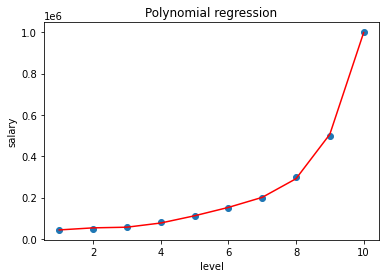

In [ ]:
# plot scatter plot of datasamples (X,Y)
# plot predicted outputs from polynomial regression
plt.scatter(x,y)
plt.plot(x,lr_poly_pred,color='red')
plt.xlabel("level")
plt.ylabel("salary")
plt.title("Polynomial regression")

Text(0.5, 1.0, 'Linear regression')

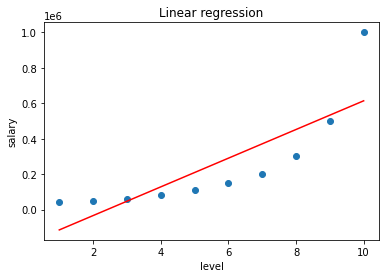

In [ ]:
# plot scatter plot of datasamples (X,Y)
# plot predicted outputs from linear regression
plt.scatter(x,y)
plt.plot(x,train_pred,color='red')
plt.xlabel("level")
plt.ylabel("salary")
plt.title("Linear regression")